# init

In [2]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.size"] = 30  # フォントサイズ

#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D

# 数値計算やデータフレーム操作に関するライブラリをインポートする
import pandas as pd

# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
#%matplotlib notebook

import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器
from numpy import linalg as LA

ImportError: dlopen: cannot load any more object with static TLS

# lyapunov exponent(lorenz)

In [8]:
def func1(r, x):
  return r*x*(1-x)

def logistic(a, x):
  return 1-(a*x)*x

def next_x(f, r, l, eps, x):#CML
    x_new = np.empty(x.shape)
    for i in range(l):
        if i == 0:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i+1])
        elif i == l - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + eps * f(r,x[i-1])
        elif i > 0 and i < l - 1:
            x_new[i] = (1 - eps) * f(r,x[i]) + 0.5 * eps * (f(r,x[i-1]) + f(r,x[i+1]))
    return x_new

#Lorenz chaos

def f1(x, p, r, b):
  return -p * x[0] + p * x[1]

def f2(x, p, r, b):
  return -x[0] * x[2] + r * x[0] - x[1]

def f3(x, p, r, b):
  return x[0] * x[1] - b * x[2]

delta=0.01

def forward(F, x, p=10, r=28, b=8.0/3.0, h=delta):
  #f; list, x; np.array
  #print(x)
  if len(F)!=x.shape[0]:
    print("Error: f & x must be the same shape")
    return 
  dim_rv=len(F)
  k1=[]
  for f in F: k1.append(h*f(x, p,r,b))
  k1=np.array(k1)

  k2=[]
  for f in F: k2.append(h*f(x+0.5*k1, p,r,b))
  k2=np.array(k2)

  k3=[]
  for f in F: k3.append(h*f(x+0.5*k2, p,r,b))
  k3=np.array(k3)

  k4=[]
  for f in F: k4.append(h*f(x+k3, p,r,b))
  np.array(k4)
  return x+(k1+2*k2+2*k3+k4)/6.0
"""
def forward(F, x, p=10, r=23, b=8.0/3.0, h=delta):
  k1=[]
  for f in F: k1.append(h*f(x, p,r,b))
  return k1+x
"""

'\ndef forward(F, x, p=10, r=23, b=8.0/3.0, h=delta):\n  k1=[]\n  for f in F: k1.append(h*f(x, p,r,b))\n  return k1+x\n'

## lorenz check

参考 めっちゃいい
https://resanaplaza.com/2021/08/14/%E3%80%90%E8%B6%85%E7%B0%A1%E5%8D%98%E3%80%91matplotlib%E3%81%A73d-plot-%E3%82%92%E3%83%9E%E3%82%A6%E3%82%B9%E3%81%A7%E3%82%B0%E3%83%AA%E3%82%B0%E3%83%AA%E5%9B%9E%E3%81%9D%E3%81%86%EF%BC%81%EF%BC%88by/


In [9]:
f=[f1,f2,f3]
nTransients = 0   # The iterates we'll throw away
nIterates = 20000      # This sets how dense the bifurcation diagram will be
ic=np.array([5, 5, 5])
for i in range(nTransients):
  ic=forward(f, ic, r=r)

states=np.empty((nIterates, 3))
states[0]=ic
for i in range(nIterates-1):
  states[i+1]=forward(f, states[i])

print(states)

[[ 5.          5.          5.        ]
 [ 5.05303394  6.09523759  5.14331846]
 [ 5.20528407  7.19444295  5.34400495]
 ...
 [ 1.51803893 -1.08709176 24.40887403]
 [ 1.27328318 -1.02205482 23.75207171]
 [ 1.05792154 -0.9591299  23.1156807 ]]


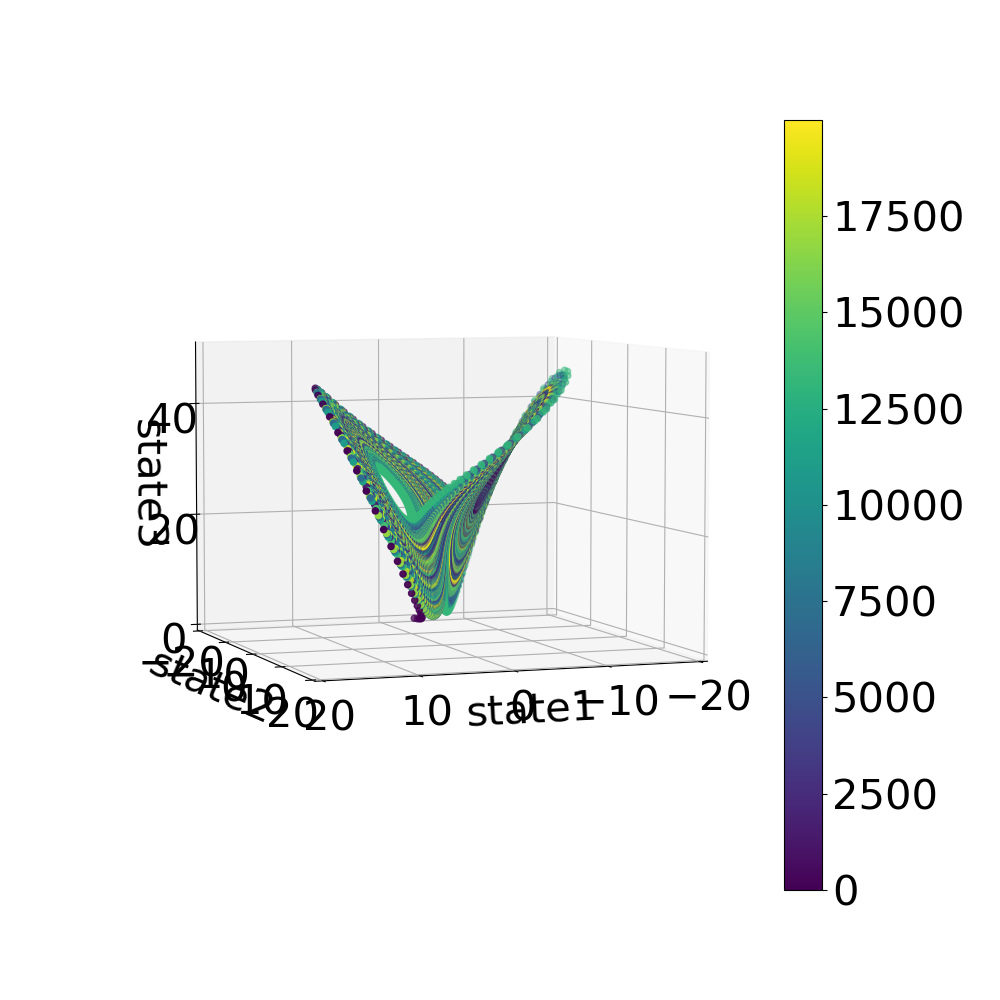

In [15]:
# %matplotlib inline
# %matplotlib notebook
# %matplotlib widget
%matplotlib ipympl
fig=plt.figure(figsize=(10,10))#(figsize=(100,100))
# ax1 = Axes3D(fig)
ax1=fig.add_subplot(projection='3d')
# 3Dグラフの見る方向の初期値を設定
ax1.view_init(elev=5, azim=70)
#図の設定
ax1.set_xlabel("state1")#,fontsize=20)
ax1.set_ylabel("state2")#,fontsize=20)  
ax1.set_zlabel("state3")#,fontsize=20)

ax1.set_xlim(-20,20)
ax1.set_ylim(-20,20)
ax1.set_zlim(0,50)

bar=ax1.scatter3D(states[:, 0], states[:, 1], states[:, 2], c=list(np.arange(len(states[:, 0]))))
fig.colorbar(bar)
ax1.grid()
plt.show()

## lyapunov

ある特定のパラメータ下において、
十分長い時間領域におけるリャプノフ指数
を計算するのに特化している.
時系列は得られない.

リャプノフ指数の定義に従う.

lorenz chaos 図示例
http://hatano-lab.iis.u-tokyo.ac.jp/thesis/soturon2000/soturon_fujibuchi.pdf

http://www.chebfun.org/examples/ode-nonlin/LyapunovExponents.html

以下のが一番良いはず.参考論文
https://link.springer.com/content/pdf/10.1007/s11071-018-4544-z.pdf

#dim_rv: length of state, like CML, GCM, ESN


おそらく計算精度, 計算時間の問題で多少違う図が得られている.

iterate数がnum_step数のオーダーは予想よりもかなり大きな数が必要であった. 参考論文のサンプル出力を参考にして, そのオーダーを推測した.

それなりの結果を得るためにかなり手間を要した.

In [5]:
from numpy import linalg as LA
import numpy as np

r_0=28
def jacobian(f, r, x, dx):#x: vector, dx: differential direction
  return (f(r, x+dx)-f(r, x))/np.linalg.norm(dx)#*dx
  
def jacobian_lorenz(x, dx, r=r_0):
  return (forward(f, x+dx, r=r)-forward(f, x, r=r))/delta#*dx

def lyp_spectrum(dim_rv=3, num_steps=100, h=delta, r=r_0):

  nTransients = 100   # The iterates we'll throw away
  nIterates =   10000   # This sets how dense the bifurcation diagram will be
  #ic = np.random.uniform(0.1, 0.9, dim_rv)  # random initial condition betn. (0,1)
  ic=np.array([10, 10, 10])
  for i in range(nTransients):
    ic=forward(f, ic, r=r)

  state_list=np.empty((nIterates, dim_rv))
  state_list[0]=ic
  for i in range(nIterates-1):
    state_list[i+1]=forward(f, state_list[i], r=r)

  #print(state_list.shape)
  lyp_spec = []
    
  L = state_list.shape[0]
  dx_list=np.identity(dim_rv)*h
  for i in range(0, L, num_steps):
    ps_lyp = np.zeros(dim_rv)
    J=np.identity(dim_rv)
    for k in range(i, min(i+num_steps, L)):
      # Calculate the Jacobian matrix
      J_f = []
      for j in range(dim_rv):
        J_f.append(jacobian_lorenz(state_list[k], dx_list[j], r=r))
      J_f=np.array(J_f).T
      # Calculate the spectrum of the Jacobian matrix
      J=np.dot(J_f, J)
    
    A = np.dot(J, np.transpose(J))

    wa = LA.eigvalsh(A)
    ra = np.sqrt(np.abs(wa))
    #print(ra)
    idx = ra.argsort()[::-1]   
    ps_lyp = np.log(ra[idx]) /float(num_steps*h)#LLP

    lyp_spec.append(ps_lyp)
    #print(ps_lyp)
  lyp_spec = np.array(lyp_spec)
  print(lyp_spec)#itinerary of LLP
  #print(lyp_spec.shape)
  
  # Take average spectrum overtime
  lyp_spec = np.mean(lyp_spec, axis=0)#GLP: average of LLP
  #print(lyp_spec.shape)
  return lyp_spec


print(lyp_spectrum(num_steps=200))

[[ 1.75090868 -0.43634354 -7.596588  ]
 [ 0.97780174 -0.45441943 -8.64055862]
 [ 2.55323849 -0.46300649 -6.88955222]
 [ 1.46231481 -1.00336724 -7.61991798]
 [ 1.02393915 -0.49890068 -8.28807714]
 [ 1.79923583 -0.17238382 -7.84742326]
 [ 1.30347272 -0.53530557 -7.91100837]
 [ 0.95826767  0.10225452 -8.52373176]
 [ 1.81491997 -0.46193394 -7.55589265]
 [ 0.92312526 -0.39296712 -9.20258874]
 [ 1.09577142  0.41485605 -8.13597882]
 [ 1.4075148  -0.66192654 -8.16583087]
 [ 1.4635024  -0.43958498 -8.26354768]
 [ 1.68195349 -0.35625134 -8.29190008]
 [ 0.91866928 -0.40402153 -8.94611762]
 [ 1.18369967  0.08762694 -8.25483885]
 [ 1.64581148 -0.48865452 -8.32370571]
 [ 0.96613622 -0.32365266 -8.19032877]
 [ 1.85209185 -0.36923887 -7.24469684]
 [ 1.31429269 -0.66863198 -7.65904386]
 [ 0.65535804  0.03509938 -9.09503503]
 [ 2.02754634 -0.38916031 -7.35698073]
 [ 1.07254913 -0.61148268 -7.98729256]
 [ 1.47290921 -0.15428535 -8.14841734]
 [ 1.65288707 -0.63609251 -7.94109662]
 [ 2.97019316 -1.48822468

### sample

[[ -0.90960437  -2.66666659 -10.09038842]
 [ -0.61926946  -2.66666661 -10.38072165]
 [ -0.59951709  -2.66666666 -10.4004738 ]
 [ -0.59814657  -2.66666666 -10.40184436]
 [ -0.59805134  -2.66666667 -10.40193959]
 [ -0.59804473  -2.66666667 -10.40194619]
 [ -0.59804427  -2.66666667 -10.40194665]
 [ -0.59804423  -2.66666667 -10.40194671]
 [ -0.59804423  -2.66666667 -10.40194673]
 [ -0.59804423  -2.66666667 -10.40194669]
 [ -0.59804423  -2.66666667 -10.40194668]
 [ -0.59804423  -2.66666667 -10.40194667]
 [ -0.59804423  -2.66666667 -10.40194671]
 [ -0.59804423  -2.66666667 -10.40194672]
 [ -0.59804423  -2.66666667 -10.40194675]
 [ -0.59804423  -2.66666667 -10.40194667]
 [ -0.59804423  -2.66666667 -10.40194672]
 [ -0.59804423  -2.66666667 -10.40194667]
 [ -0.59804423  -2.66666667 -10.40194671]
 [ -0.59804423  -2.66666667 -10.40194669]
 [ -0.59804423  -2.66666667 -10.40194673]
 [ -0.59804423  -2.66666667 -10.40194673]
 [ -0.59804423  -2.66666667 -10.40194669]
 [ -0.59804423  -2.66666667 -10.40

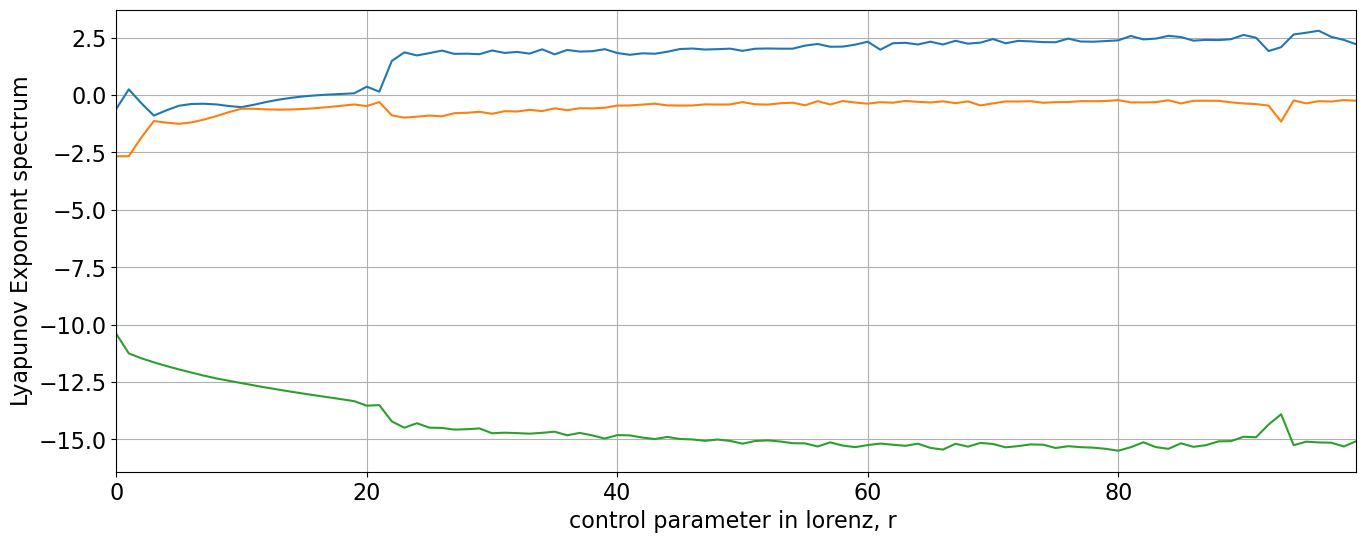

In [6]:
pLow = 0
pHigh = 100
nSteps=100
pInc = (pHigh - pLow) / nSteps
rs = np.arange(pLow, pHigh, pInc)

#np.random.seed(1010)

lyp_spec_arr=[]
for r in rs:
  lyp_spec_arr.append(lyp_spectrum(r=r))

lyp_spec_arr = np.array(lyp_spec_arr)
print(lyp_spec_arr.shape)

import matplotlib.pyplot as plt
# Plot all the spectrum
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('control parameter in lorenz, r ')
ax1.set_ylabel('Lyapunov Exponent spectrum')
#ax1.set_xticks()
ax1.set_xlim([rs[0],rs[-1]])
for k in range(lyp_spec_arr.shape[1]):
    ax1.plot(rs, lyp_spec_arr[:, k])
ax1.grid()